In [82]:
import pandas as pd

In [83]:
season_5 = pd.read_csv("matches_test_3.csv", index_col=0)

matches = season_5


In [84]:
matches.head()

,date,time_x,comp,round_x,day_x,venue_x,result_x,gf_x,ga_x,opponent_x,...,int,clr,tkl,tkl.1,att,tkl%,lost,err,season,team
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,...,10.0,18.0,16.0,7.0,11.0,63.6,4.0,0.0,2022,Manchester City
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,...,6.0,9.0,14.0,6.0,8.0,75.0,2.0,0.0,2022,Manchester City
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,...,7.0,19.0,15.0,5.0,15.0,33.3,10.0,1.0,2022,Manchester City
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Brentford,...,5.0,13.0,12.0,6.0,9.0,66.7,3.0,3.0,2022,Manchester City
0,2024-08-17,15:00,Premier League,Matchweek 1,Sat,Home,W,2.0,0.0,Wolves,...,8.0,16.0,18.0,8.0,16.0,50.0,8.0,2.0,2022,Arsenal


In [85]:
matches.shape

(840, 60)

In [86]:
del matches["comp"]
del matches["notes_x"]

In [87]:
matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result_x"] == "W").astype("int")

In [88]:
import pandas as pd

# Sample data
team_attack_strength = {
    'Manchester City': 90,
    'Manchester United': 85,
    'Everton': 78,
    'Wolverhampton Wanderers': 77,
    'Crystal Palace': 75,
    'West Ham United': 80,
    'Tottenham Hotspur': 82,
    'Arsenal': 86,
    'Bournemouth': 74,
    'Fulham': 76,
    'Brentford': 79,
    'Chelsea': 84,
    'Nottingham Forest': 70,
    'Brighton and Hove Albion': 81,
    'Aston Villa': 79,
    'Liverpool': 88,
    'Newcastle United': 83,
    'Luton Town': 68,
    'Burnley': 72,
    'Sheffield United': 70,
    'Leicester City': 71,
    'Ipswich Town': 65,
    'Southampton': 67
}

team_defense_strength = {
    'Manchester City': 85,
    'Manchester United': 82,
    'Everton': 74,
    'Wolverhampton Wanderers': 75,
    'Crystal Palace': 72,
    'West Ham United': 78,
    'Tottenham Hotspur': 80,
    'Arsenal': 83,
    'Bournemouth': 70,
    'Fulham': 72,
    'Brentford': 76,
    'Chelsea': 82,
    'Nottingham Forest': 67,
    'Brighton and Hove Albion': 78,
    'Aston Villa': 77,
    'Liverpool': 84,
    'Newcastle United': 81,
    'Luton Town': 65,
    'Burnley': 69,
    'Sheffield United': 68,
    'Leicester City': 66,
    'Ipswich Town': 63,
    'Southampton': 65
}

# Assuming you have a 'matches' DataFrame with a 'team_name' column
# Map attack and defense strength to the team name
predictorsl = ["venue_code", "opp_code","hour", "day_code","referee"]
matches['attack_strength'] = matches['team'].map(team_attack_strength)
matches['defense_strength'] = matches['team'].map(team_defense_strength)

# Check the updated DataFrame
print(matches.head())


        date time_x      round_x day_x venue_x result_x  gf_x  ga_x  \
1 2024-08-18  16:30  Matchweek 1   Sun    Away        W   2.0   0.0   
2 2024-08-24  15:00  Matchweek 2   Sat    Home        W   4.0   1.0   
3 2024-08-31  17:30  Matchweek 3   Sat    Away        W   3.0   1.0   
4 2024-09-14  15:00  Matchweek 4   Sat    Home        W   2.0   1.0   
0 2024-08-17  15:00  Matchweek 1   Sat    Home        W   2.0   0.0   

     opponent_x  xg_x  ...  tkl.1   att  tkl%  lost  err season  \
1       Chelsea   0.8  ...    7.0  11.0  63.6   4.0  0.0   2022   
2  Ipswich Town   3.3  ...    6.0   8.0  75.0   2.0  0.0   2022   
3      West Ham   3.0  ...    5.0  15.0  33.3  10.0  1.0   2022   
4     Brentford   2.1  ...    6.0   9.0  66.7   3.0  3.0   2022   
0        Wolves   1.2  ...    8.0  16.0  50.0   8.0  2.0   2022   

              team target  attack_strength  defense_strength  
1  Manchester City      1               90                85  
2  Manchester City      1               90  

In [89]:
#Feature Encoding

In [90]:
matches["venue_code"] = matches["venue_x"].astype("category").cat.codes
matches["opp_code"] = matches["opponent_x"].astype("category").cat.codes
matches["referee"] = matches["referee_x"].astype("category").cat.codes
matches["hour"] = matches["time_x"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek

In [91]:
matches.head()

,date,time_x,round_x,day_x,venue_x,result_x,gf_x,ga_x,opponent_x,xg_x,...,season,team,target,attack_strength,defense_strength,venue_code,opp_code,referee,hour,day_code
1,2024-08-18,16:30,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,0.8,...,2022,Manchester City,1,90,85,0,6,1,16,6
2,2024-08-24,15:00,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,3.3,...,2022,Manchester City,1,90,85,1,10,20,15,5
3,2024-08-31,17:30,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,3.0,...,2022,Manchester City,1,90,85,0,21,13,17,5
4,2024-09-14,15:00,Matchweek 4,Sat,Home,W,2.0,1.0,Brentford,2.1,...,2022,Manchester City,1,90,85,1,3,4,15,5
0,2024-08-17,15:00,Matchweek 1,Sat,Home,W,2.0,0.0,Wolves,1.2,...,2022,Arsenal,1,86,83,1,22,8,15,5


In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=20, random_state=1)
train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']

predictors1 = ["venue_code",  "opp_code","hour","day_code","referee","attack_strength","defense_strength"]

rf = RandomForestClassifier(n_estimators=50, min_samples_split=20, random_state=1)
rf.fit(train[predictors1], train["target"])

RandomForestClassifier(min_samples_split=20, n_estimators=50, random_state=1)

In [93]:
preds = rf.predict(test[predictors1])
from sklearn.metrics import accuracy_score
error = accuracy_score(test["target"], preds)
error

0.6614349775784754

In [94]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,217,62
1,89,78


In [95]:
from sklearn.metrics import precision_score
precision_score(test["target"], preds,average='micro')

0.6614349775784754

In [96]:
grouped_matches = matches.groupby("team")
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [97]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

#cols = ["sh_x","xg_y","gf_x","sh_y","sot","att","tkl%","tklw","int","clr","tkl","err","lost","ga_x","gls","pass","blocks","dist","fk", "pk", "pkatt"]
cols = ["xg_y","gf_x","sh_y","sot","err","lost","ga_x","gls","pass","blocks","dist","fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time_x,round_x,day_x,venue_x,result_x,gf_x,ga_x,opponent_x,xg_x,...,err_rolling,lost_rolling,ga_x_rolling,gls_rolling,pass_rolling,blocks_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
8,2023-09-23,15:00,Matchweek 6,Sat,Home,W,2.0,0.0,Nott'ham Forest,1.3,...,0.6,4.4,0.6,2.8,6.0,7.4,16.06,0.6,0.2,0.4
10,2023-09-30,15:00,Matchweek 7,Sat,Away,L,1.0,2.0,Wolves,0.9,...,0.4,4.6,0.6,2.6,5.8,7.6,16.72,1.0,0.2,0.4
12,2023-10-08,16:30,Matchweek 8,Sun,Away,L,0.0,1.0,Arsenal,0.5,...,0.2,5.4,1.0,2.6,5.6,7.2,17.00,1.2,0.2,0.4
13,2023-10-21,15:00,Matchweek 9,Sat,Home,W,2.0,1.0,Brighton,0.8,...,0.2,5.6,1.0,2.2,5.2,7.2,16.52,0.8,0.2,0.2
15,2023-10-29,15:30,Matchweek 10,Sun,Away,W,3.0,0.0,Manchester Utd,4.0,...,0.2,6.2,1.0,1.6,7.0,9.0,17.32,1.0,0.0,0.0
16,2023-11-04,15:00,Matchweek 11,Sat,Home,W,6.0,1.0,Bournemouth,1.9,...,0.6,6.2,0.8,1.6,7.2,9.2,17.48,1.2,0.2,0.2
18,2023-11-12,16:30,Matchweek 12,Sun,Away,D,4.0,4.0,Chelsea,2.9,...,0.4,5.8,1.0,2.4,7.6,9.0,17.32,0.8,0.2,0.2
19,2023-11-25,12:30,Matchweek 13,Sat,Home,D,1.0,1.0,Liverpool,1.3,...,0.6,5.8,1.4,3.0,8.6,10.6,16.78,0.8,0.4,0.4
21,2023-12-03,16:30,Matchweek 14,Sun,Home,D,3.0,3.0,Tottenham,2.6,...,0.8,5.8,1.4,3.2,8.4,10.2,17.06,1.0,0.4,0.4
22,2023-12-06,20:15,Matchweek 15,Wed,Away,L,0.0,1.0,Aston Villa,0.6,...,0.8,5.4,1.8,3.2,9.0,11.2,15.98,0.8,0.4,0.4


In [98]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [99]:
matches_rolling

date time_x       round_x day_x venue_x  \
team                                                                       
Arsenal                 7  2023-09-24  14:00   Matchweek 6   Sun    Home   
                        9  2023-09-30  15:00   Matchweek 7   Sat    Away   
                        11 2023-10-08  16:30   Matchweek 8   Sun    Home   
                        12 2023-10-21  17:30   Matchweek 9   Sat    Away   
                        14 2023-10-28  15:00  Matchweek 10   Sat    Home   
...                               ...    ...           ...   ...     ...   
Wolverhampton Wanderers 44 2024-05-19  16:00  Matchweek 38   Sun    Away   
                        0  2024-08-17  15:00   Matchweek 1   Sat    Away   
                        1  2024-08-25  14:00   Matchweek 2   Sun    Home   
                        3  2024-08-31  15:00   Matchweek 3   Sat    Away   
                        4  2024-09-15  16:30   Matchweek 4   Sun    Home   

                           result_x  gf_x  ga_x       opponent_x  xg_x  ...  \
team                                                                    ...   
Arsenal                 7         D   2.0   2.0        Tottenham   1.8  ...   
                        9         W   4.0   0.0      Bournemouth   3.4  ...   
                        11        W   1.0   0.0  Manchester City   0.4  ...   
                        12        D   2.0   2.0          Chelsea   1.0  ...   
                        14        W   5.0   0.0    Sheffield Utd   2.8  ...   
...                             ...   ...   ...              ...   ...  ...   
Wolverhampton Wanderers 44        L   0.0   2.0        Liverpool   0.5  ...   
                        0         L   0.0   2.0          Arsenal   0.5  ...   
                        1         L   2.0   6.0          Chelsea   1.9  ...   
                        3         D   1.0   1.0  Nott'ham Forest   0.7  ...   
                        4         L   1.0   2.0    Newcastle Utd   1.2  ...   

                            err_rolling  lost_rolling  ga_x_rolling  \
team                                                                  
Arsenal                 7           0.4           5.0           0.8   
                        9           0.6           4.8           1.0   
                        11          0.6           5.6           1.0   
                        12          0.2           7.0           0.6   
                        14          0.6           7.0           0.8   
...                                 ...           ...           ...   
Wolverhampton Wanderers 44          0.0           9.8           2.4   
                        0           0.2           9.8           2.4   
                        1           0.2           9.0           2.6   
                        3           0.2           8.8           3.6   
                        4           0.2           7.8           2.8   

                           gls_rolling pass_rolling blocks_rolling  \
team                                                                 
Arsenal                 7          1.8          7.0           11.2   
                        9          1.6          8.6           13.4   
                        11         2.2         10.0           14.2   
                        12         2.0         10.4           14.6   
                        14         1.8         10.6           13.6   
...                                ...          ...            ...   
Wolverhampton Wanderers 44         0.8          9.8           14.8   
                        0          0.8          8.2           13.6   
                        1          0.8          7.8           12.8   
                        3          0.8          8.0           13.4   
                        4          0.8          7.4           13.4   

                           dist_rolling fk_rolling  pk_rolling  pkatt_rolling  
team                                                                           
Arsenal              

In [100]:
matches_rolling = matches_rolling.droplevel('team')
matches_rolling.index = range(matches_rolling.shape[0])

In [101]:

def make_predictions(data, predictors):
    train = data[data["date"] < '2024-01-01']
    test = data[data["date"] > '2024-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = accuracy_score(test["target"], preds)
    feature_importances = rf.feature_importances_
    return combined, error,feature_importances

In [102]:
combined, accuracy,feature_importances = make_predictions(matches_rolling, predictors1 + new_cols)
accuracy

0.6797235023041475

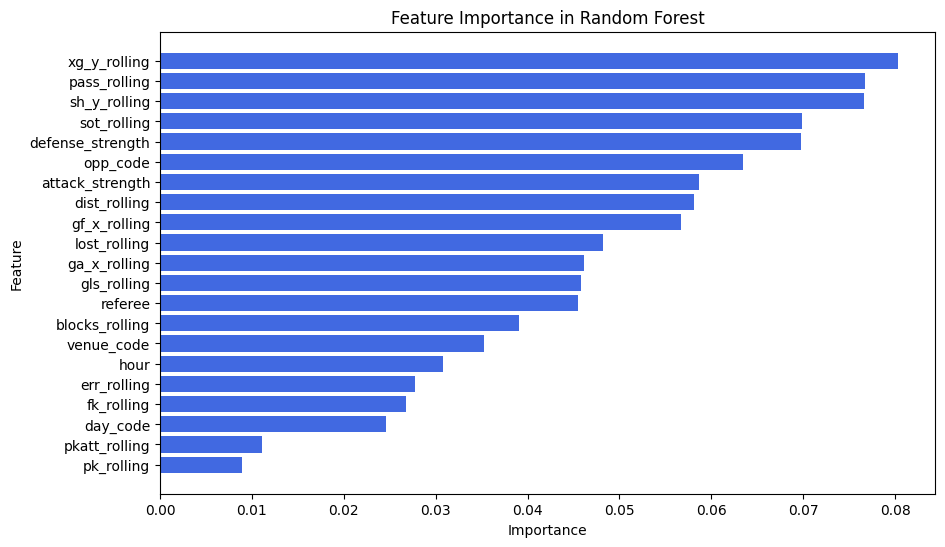

In [103]:
feature_importance_df = pd.DataFrame({
    'Feature': predictors1 + new_cols,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
# Plot the feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [104]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train Random Forest


# Feature Importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': predictors1 + new_cols, 
                                      'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display Features
print("Top Features in Random Forest:")
print(feature_importance_df.head(15))


Top Features in Random Forest:
             Feature  Importance
7       xg_y_rolling    0.080330
15      pass_rolling    0.076710
9       sh_y_rolling    0.076616
10       sot_rolling    0.069872
6   defense_strength    0.069809
1           opp_code    0.063435
5    attack_strength    0.058628
17      dist_rolling    0.058076
8       gf_x_rolling    0.056647
12      lost_rolling    0.048163
13      ga_x_rolling    0.046184
14       gls_rolling    0.045770
4            referee    0.045465
16    blocks_rolling    0.039102
0         venue_code    0.035304


In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [106]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=50, shuffle=True, random_state=42)

# Perform K-Fold Cross Validation
scores = cross_val_score(rf, train[predictors1], train["target"], cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.5        0.625      0.75       0.625      0.625      0.25
 0.75       0.625      0.625      1.         0.625      0.875
 0.375      0.75       0.75       0.5        0.625      0.625
 0.375      0.5        0.25       0.5        0.875      0.75
 1.         0.375      0.5        0.625      0.375      0.625
 0.75       0.25       0.875      0.625      0.5        0.75
 0.375      0.75       0.5        0.625      0.375      0.625
 0.71428571 0.57142857 0.85714286 0.71428571 0.57142857 0.85714286
 0.71428571 1.        ]
Mean accuracy: 0.625


In [109]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

train=matches_rolling
X = train[predictors1+new_cols]  # Your feature set
y = train["target"]   # Your target variable

# Leave-One-Out Cross Validation
loo = LeaveOneOut()
model = rf

scores = cross_val_score(model, X, y, cv=loo)
print("LOOCV Accuracy:", scores.mean())




LOOCV Accuracy: 0.6689560439560439


In [49]:
print("Accuracy:", accuracy_score(test["target"], preds))
print("Precision:", precision_score(test["target"], preds,average='micro'))  
print("Recall:", recall_score(test["target"], preds,average='micro'))
print("F1 Score:", f1_score(test["target"], preds,average='micro'))

Accuracy: 0.6614349775784754
Precision: 0.6614349775784754
Recall: 0.6614349775784754
F1 Score: 0.6614349775784754
